In [34]:
using Modia
using Modia.Electric
using Modia.Rotational
using Modia.Blocks
using Plots

gr(size=(950,300))

Plots.GRBackend()

In [51]:
@model CurrentController begin
    
  step=Step(height=1,startTime=0)
    
  k=30   # Gain of PI current controller
  T=0.005   # Time constant of PI current controller
  PI1=PI(T=T, k=k)
  firstOrder=FirstOrder(k=1,T=0.001)
  signalVoltage=SignalVoltage()
  currentSensor=CurrentSensor()
  feedback=Feedback()
    
  inductor=Inductor(L=0.061) 
  resistor=Resistor(R=13.8)
  ground=Ground()
    
  Jmotor=Inertia(J=0.0025) 
  emf=EMF(k=1.016)
    
  gear=IdealGear(ratio=105)
  spring=SpringDamper(c=5e5, d=500)
  load=Inertia(J=100)
    
@equations begin
  connect(feedback.u1, step.y)
  connect(feedback.y, PI1.u) 
  connect(PI1.y, firstOrder.u)
  connect(firstOrder.y, signalVoltage.v)
  connect(signalVoltage.p, resistor.p)
  connect(resistor.n, inductor.p)
  connect(inductor.n, emf.p)
  connect(emf.n, ground.p)
  connect(ground.p, currentSensor.p)
  connect(currentSensor.n, signalVoltage.n)
  connect(currentSensor.i, feedback.u2)
        
  connect(emf.flange, Jmotor.flange_a)
  connect(Jmotor.flange_b, gear.flange_a)
  connect(gear.flange_b, spring.flange_a)
  connect(spring.flange_b, load.flange_a)
  end
end

result = simulate(CurrentController, 0.25)


Simulating model: CurrentController
Number of equations: 81
Number of variables: 89
Number of continuous states: 8
Number of non states: 3


Dict{AbstractString,Any} with 114 entries:
  "emf.p.v"                 => [0.0, 0.00049779, 0.00371181, 0.0117198, 0.02596…
  "resistor.n.i"            => [-0.0, -0.0141205, -0.0517408, -0.106446, -0.172…
  "load.a"                  => [0.0, 2.51612e-5, 0.000197519, 0.000655916, 0.00…
  "der_gear.phi_a"          => Any[0.0, 0.000496987, 0.0036761, 0.0115272, 0.02…
  "feedback.y"              => [1.0, 0.98588, 0.948259, 0.893554, 0.827205, 0.7…
  "spring.flange_a.phi"     => [0.0, 3.00814e-10, 4.52152e-9, 2.15446e-8, 6.438…
  "der(emf.p.v)"            => [0.0, 5.80127, 21.2573, 43.6998, 70.7721, 100.54…
  "step.offset"             => 0.0
  "signalVoltage.i"         => [-0.0, -0.0141205, -0.0517408, -0.106446, -0.172…
  "der_spring.flange_b.phi" => Any[0.0, 1.70456e-9, 2.56426e-8, 1.25314e-7, 3.9…
  "Jmotor.flange_b.phi"     => [0.0, 3.15855e-8, 4.7476e-7, 2.26218e-6, 6.76e-6…
  "Jmotor.phi"              => [0.0, 3.15855e-8, 4.7476e-7, 2.26218e-6, 6.76e-6…
  "PI1.x"                   => 

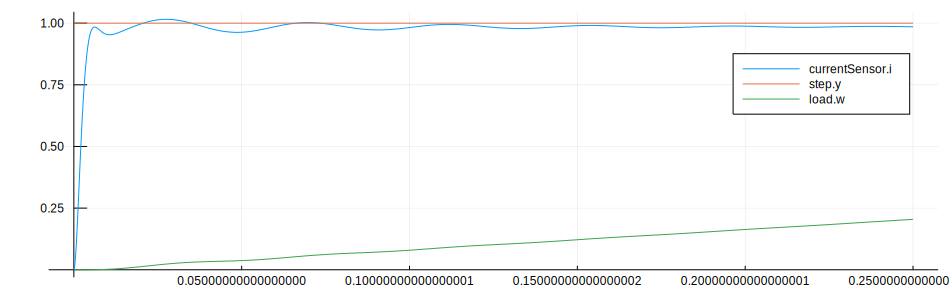

In [52]:
plot(result["time"], result["currentSensor.i"], label="currentSensor.i")
plot!(result["time"], result["step.y"], label="step.y")
plot!(result["time"], result["load.w"], label="load.w")
plot!(frame_style=:origin)